In [23]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/cifar/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 51):
    filename = f'{base_path}docu_multi_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

num = 49
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']



Round 10, Attack Type Multi Attack: Average Time = 0.1079
Round 11, Attack Type Multi Attack: Average Time = 0.1150
Round 12, Attack Type Multi Attack: Average Time = 0.1251
Round 13, Attack Type Multi Attack: Average Time = 0.1285
Round 14, Attack Type Multi Attack: Average Time = 0.1382
Round 15, Attack Type Multi Attack: Average Time = 0.1437
Round 16, Attack Type Multi Attack: Average Time = 0.1544
Round 17, Attack Type Multi Attack: Average Time = 0.1752
Round 18, Attack Type Multi Attack: Average Time = 0.1826
Round 19, Attack Type Multi Attack: Average Time = 0.1874
Round 20, Attack Type Multi Attack: Average Time = 0.1883
Round 21, Attack Type Multi Attack: Average Time = 0.2283
Round 22, Attack Type Multi Attack: Average Time = 0.2169
Round 23, Attack Type Multi Attack: Average Time = 0.2304
Round 24, Attack Type Multi Attack: Average Time = 0.2261
Round 25, Attack Type Multi Attack: Average Time = 0.2424
Round 26, Attack Type Multi Attack: Average Time = 0.2485
Round 27, Atta

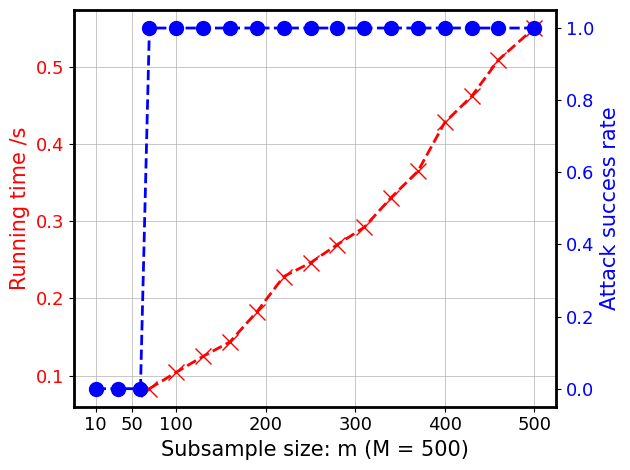

In [55]:
#multi

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [70+30*i for i in range(15)]
x_values[-1] = 500

new_multi = [multi_times[5+3*i] for i in range(15)]
new_multi[6] = 0.24611992094251845
multi_coef = [0 if i < 3 else 1 for i in range(18)]

multi = [multi_times[i*3] for i in range(14)]


marker_size = 11


# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, new_multi, label='Multivariate attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)

ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
ax2.plot(x_values_success, multi_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

ax2.set_ylabel('Attack success rate', color='blue',fontsize=15)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m (M = 500)', fontsize=15)
ax1.set_ylabel('Running time /s', fontsize=15, color='red')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2


ax1.set_xticks([10, 50,100,200,300,400,500])
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
plt.tight_layout()

# 保存为PDF格式
plt.savefig('./figure/true/cifar_multi.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('./figure/true/cifar_multi.png', bbox_inches='tight')

plt.show()


In [25]:
len(multi_times)

49

In [39]:
new_multi = [multi_times[5+3*i] for i in range(15)]
new_multi[6] = 0.24611992094251845
new_multi

[0.08314361572265624,
 0.10443057332720075,
 0.12505455919214198,
 0.14366308072718179,
 0.18260122360067166,
 0.22825840178956378,
 0.24611992094251844,
 0.26969748497009277,
 0.29204543431599933,
 0.3303864408046641,
 0.36468607314089513,
 0.4277869681922757,
 0.46155999183654783,
 0.5087632695022895,
 0.5499175091584524]

In [12]:
multi_times

[None,
 None,
 None,
 None,
 None,
 0.08472949266433716,
 0.09496739506721497,
 0.09299516677856445,
 0.10757526484402744,
 0.1074976921081543,
 0.1150813286121075,
 0.12410671894366924,
 0.12459116715651292,
 0.136874863079616,
 0.14460698195866176,
 0.16095676024754843,
 0.15908476284572057,
 0.16842068158663237,
 0.20435590403420584,
 0.1924884869502141,
 0.22306098256792342,
 0.20556514603751047,
 0.21374757473285383,
 0.2230560412773719,
 0.22716004507882254,
 0.23854058129446848,
 0.2556811571121216,
 0.26122282232557026,
 0.27110605580466135,
 0.2853036608014788,
 0.298687219619751,
 0.3161243370601109,
 0.32070893900735037,
 0.3639450584139143,
 0.37374656541006906,
 0.36707432453448957,
 0.4134498926309439,
 0.4391742604119437,
 0.4344691719327654,
 0.4524853412921612,
 0.494223884173802,
 0.45047405787876676,
 0.4601860046386719,
 0.4703944462996263,
 0.4995791571480887,
 0.5404919045312064,
 0.5284814834594727,
 0.5406237932351919,
 0.554491434778486]

In [31]:
x_values = [70+30*i for i in range(15)]
x_values[-1] = 500
x_values

[70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 500]